In [136]:
from ACLScheduleTest.Simulate import Simulator

In [137]:
Print_limit = 10
Epoch  = 0
from dill.source import getsource
def schedule_in_func(workers, cache, av_mem, factor_node_dict, calculated_node_dict, dsk, global_dict):
    global  Print_limit, Epoch
    Epoch += 1
    if Print_limit >= Epoch:
        print(f'Epoch {Epoch}')
        print('#'*60,'\n')

        print(f'workers:调度其中各个workers的状态, 是一个词典(dict)')
        print('key是worker的名字，如\'worker_0\'; ')
        print('value有两种，如果该worker没有正在运行, 就输出None；如果正在计算某个节点node并且已经运行了1单位时间，则输出[\'node\', 1]')
        for key in workers.keys():
            print(key, workers[key])

        print('#'*60,'\n')

        print(f'cache:内存存储状态，存储各个节点内用于计算的数值。也是一个dict')
        print('key是节点node的名字，value是存储的具体数值')
        for key in cache.keys():
            print(key, cache[key])
        print('#'*60,'\n')

        print(f'av_mem:当前状态下可用的内存，float格式\n{av_mem}')
        print('#'*60,'\n')

        print(f'factor_node_dict:因子节点的状态，key是node名字，value是输出数值，如果是None表示未被计算到')
        for key in factor_node_dict.keys():
            print(key, factor_node_dict[key])
        print('#'*60,'\n')

        print(f'calculated_node_dict:记录节点是否已经被计算完，value为bool格式\n')
        for key in calculated_node_dict.keys():
            print(key, calculated_node_dict[key])
        print('#'*60,'\n')

        print(f'dsk:网络结构，运算的依赖关系\n')
        print('每个key是node的名字， value是一个元组，第一个值是要计算的lambda函数，后面为自变量')
        print('自变量可以是要计算的数值，也可以是其他node。')
        for key in dsk.keys():
            print(key, getsource(dsk[key][0].func), dsk[key][1:], '\n')

        print('#'*60,'\n')
        print(f'global_dict:\n{global_dict}')

    factor_node = set([k for k in factor_node_dict if factor_node_dict[k] is None])

    if len(factor_node) == 0:
        return None

    workers_nodes = set([workers[k][0] for k in workers if workers[k] is not None])

    def topoOrder():
        topoQueue = []
        q = list(factor_node - set(cache.keys()) - workers_nodes)

        nodeList = set(dsk.keys()) - set(factor_node)
        while len(q):
            node, q = q[0], q[1:]

            topoQueue.append(node)

            append_nodes = [arg for arg in dsk[node][1:] if
                            (arg in nodeList) and (arg not in cache.keys()) and (arg not in workers_nodes)]
            nodeList = nodeList - set(append_nodes)
            q = q + append_nodes
        return topoQueue

    topo_node = topoOrder()

    nodeList = dsk.keys()

    def available_node():
        for node in topo_node:
            if dsk[node][0].mem > av_mem:
                continue
            args = dsk[node][1:]
            isAvailable = True
            for arg in args:
                if (arg in nodeList) and (arg not in cache):
                    isAvailable = False
                    break
            if isAvailable:
                return node
        return None
    if Print_limit >= Epoch:
        print(f'%' * 60,'\n')


        print(f'return: 输出一个node，表示下一步即将调用于计算的worker，如果不能调用就返回None \n{available_node()}')
        print('-'*60, '\n'*5)


    return available_node()




In [138]:
def schedule_out_func(workers, cache, av_mem, factor_node_dict, calculated_node_dict, dsk, global_dict):
    # need to calculater
    factor_node = set([k for k in factor_node_dict if factor_node_dict[k] is None])

    if len(factor_node) == 0:
        return []

    workers_nodes = set([workers[k][0] for k in workers if workers[k] is not None])

    def topoOrder():
        topoQueue = []
        q = list(factor_node - set(cache.keys()) - workers_nodes)

        nodeList = set(dsk.keys()) - set(factor_node)
        while len(q):
            node, q = q[0], q[1:]

            topoQueue.append(node)

            append_nodes = [arg for arg in dsk[node][1:] if
                            (arg in nodeList) and (arg not in cache.keys()) and (arg not in workers_nodes)]
            nodeList = nodeList - set(append_nodes)
            q = q + append_nodes
        return topoQueue

    topo_node = topoOrder()

    def trash_cache():
        trash_node = []

        for node in cache:
            isTrash = True
            for tp_node in topo_node + list(workers_nodes):
                if node in dsk[tp_node][1:]:
                    isTrash = False
                    break
            if isTrash:
                trash_node.append(node)
        return trash_node

    return trash_cache()

Epoch 1
############################################################ 

workers:调度其中各个workers的状态, 是一个词典(dict)
key是worker的名字，如'worker_0'; 
value有两种，如果该worker没有正在运行, 就输出None；如果正在计算某个节点node并且已经运行了1单位时间，则输出['node', 1]
worker_0 None
worker_1 None
worker_2 None
worker_3 None
worker_4 None
worker_5 None
worker_6 None
worker_7 None
worker_8 None
worker_9 None
############################################################ 

cache:内存存储状态，存储各个节点内用于计算的数值。也是一个dict
key是节点node的名字，value是存储的具体数值
############################################################ 

av_mem:当前状态下可用的内存，float格式
35
############################################################ 

factor_node_dict:因子节点的状态，key是node名字，value是输出数值，如果是None表示未被计算到
node65 None
node84 None
node93 None
node50 None
node19 None
node92 None
node69 None
node64 None
node48 None
node76 None
node89 None
node95 None
node96 None
node75 None
node56 None
node35 None
node45 None
node98 None
node78 None
node57 None
node63 None
node73 None
node90 None
node91 None
node99 None
no

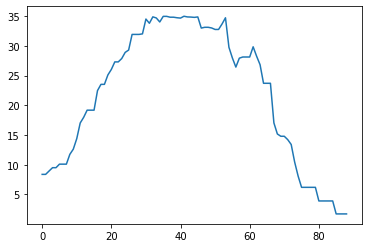

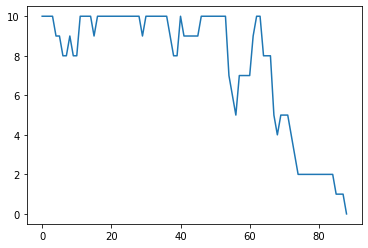

In [139]:
sim = Simulator()
sim.simulate(schedule_in_func, schedule_out_func, mem_bound=35)